## Import library and read in dataset

In [49]:
# To manipulate data, NLP and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output

# Standard plotly imports
import plotly as py
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import cufflinks
import plotly.express as px

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)

# To interactive buttons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings("ignore")

#nlp
import string
import re    #for regex
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to C:\Users\Alan
[nltk_data]     Khoo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
df = pd.read_csv('Video_Details.csv', index_col=None)

In [18]:
df

,Unnamed: 0,Name,Title,Published_date,Views,Likes,Comments,Category,Tags,Month
0,0,Ludwig,This streamer made a mistake challenging me...,2021-12-26,522702,54539,2524,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
1,1,Ludwig,this video will get me banned from china,2021-12-25,639875,53335,2244,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
2,2,Ludwig,What could possibly go wrong?,2021-12-24,695172,40894,892,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
3,3,Ludwig,I watched EVERY Epic Rap Battle of History to ...,2021-12-23,538988,29555,995,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
4,4,Ludwig,Paying streamers to do whatever I say,2021-12-22,700680,47889,973,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
...,...,...,...,...,...,...,...,...,...,...
1836,1836,Stanz,NEW LOVE OF MY LIFE?!?! - Pokemon Shield Nuzl...,2019-11-28,2794,92,17,20,Nathan Stanz NathanStanz OneNightStanz Stanz P...,2019-11
1837,1837,Stanz,SPEEDRUNS FOR SUBS GONE WRONG,2019-11-15,1479,65,15,20,Nathan Stanz NathanStanz OneNightStanz Stanz H...,2019-11
1838,1838,Stanz,Destroying Knockoff Clint Stevens At Minecraft,2019-10-09,8185,260,17,20,minecraft multiplayer survival custom minecraf...,2019-10
1839,1839,Stanz,Hacker steals my Paypal DURING STREAM,2019-09-17,1239,61,7,20,rainbow six siege case opening twitch twitch f...,2019-09


## Perform EDA on dataset

In [21]:
#Looking for Null values and the types of our data
df = df.drop(['Unnamed: 0'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1841 non-null   object
 1   Title           1841 non-null   object
 2   Published_date  1841 non-null   object
 3   Views           1841 non-null   int64 
 4   Likes           1841 non-null   int64 
 5   Comments        1841 non-null   int64 
 6   Category        1841 non-null   int64 
 7   Tags            1841 non-null   object
 8   Month           1841 non-null   object
dtypes: int64(4), object(5)
memory usage: 129.6+ KB


,Name,Title,Published_date,Views,Likes,Comments,Category,Tags,Month
0,Ludwig,This streamer made a mistake challenging me...,2021-12-26,522702,54539,2524,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
1,Ludwig,this video will get me banned from china,2021-12-25,639875,53335,2244,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
2,Ludwig,What could possibly go wrong?,2021-12-24,695172,40894,892,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
3,Ludwig,I watched EVERY Epic Rap Battle of History to ...,2021-12-23,538988,29555,995,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12
4,Ludwig,Paying streamers to do whatever I say,2021-12-22,700680,47889,973,20,ludwig ludwigahgren ahgren gaming chat stream ...,2021-12


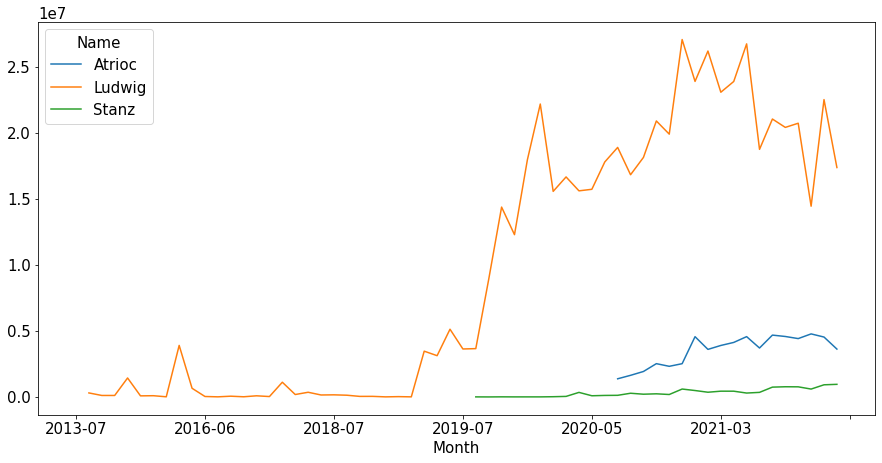

In [56]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['Month','Name']).sum()['Views'].unstack().plot(ax=ax)

Plot the distribution of views from the data

In [43]:
fig = px.histogram(df, x="Views", nbins=20, color="Name")
fig.show()

In [36]:
percent_category = round(df["Category"].value_counts(), 2)
categories = round(df["Category"].value_counts() / len(df["Category"]) * 100,2)
labels = list(categories.index)
values = list(categories.values)
trace1 = go.Pie(labels=labels, 
                values=values, 
                marker=dict(colors=['red']), 
                text=(percent_category.index.map(str)),
                hovertext=(percent_category.values.astype(str)))
layout = go.Layout(title="Views by Category", 
                   legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [44]:
#Unique word count
df['count_unique_word']=df["Title"].apply(lambda x: len(set(str(x).split())))
df['count_unique_word_tags']=df["Tags"].apply(lambda x: len(set(str(x).split())))
df[['count_unique_word_tags','count_unique_word']].iplot(kind="histogram",bins=50, theme="white", histnorm='probability', title="Distribuitions of Word Count in Title and Tags",
xTitle='Distribuition',
yTitle='Probability')

In [47]:
# Dataframe for unique word count for video titles
df3 = df[['count_unique_word','Views']]
df3 = df3.groupby('count_unique_word').mean().reset_index()
# Dataframe for unique word count for video tags
df4 = df[['count_unique_word_tags','Views']]
df4 = df4.groupby('count_unique_word_tags').mean().reset_index()
trace1 = go.Bar(x=df3['count_unique_word'],y=df3['Views'],name = 'Views vs Video Title Word Count',visible = True)
trace2 = go.Bar(x=df4['count_unique_word_tags'],y=df4['Views'],name = 'Views vs Video Tags Word Count',visible = True)
data=[trace1,trace2]
updatemenus = list([
    dict(active=-1,
         showactive=True,
         buttons=list([  
            dict(
                label = 'Views vs Video Title Word Count',
                 method = 'update',
                 args = [{'visible': [True, False]}, 
                     {'title': 'Views vs Video Title Word Count'}]),
             
             dict(
                  label = 'Views vs Video Tags Word Count',
                 method = 'update',
                 args = [{'visible': [False, True]},
                     {'title': 'Views vs Video Tags Word Count'}]),
        ]),
    )
])
layout = dict(title="*(Select from Dropdown)* Views vs Word Count", 
              showlegend=False,
              updatemenus=updatemenus)
fig = dict(data=data, layout=layout)
iplot(fig)

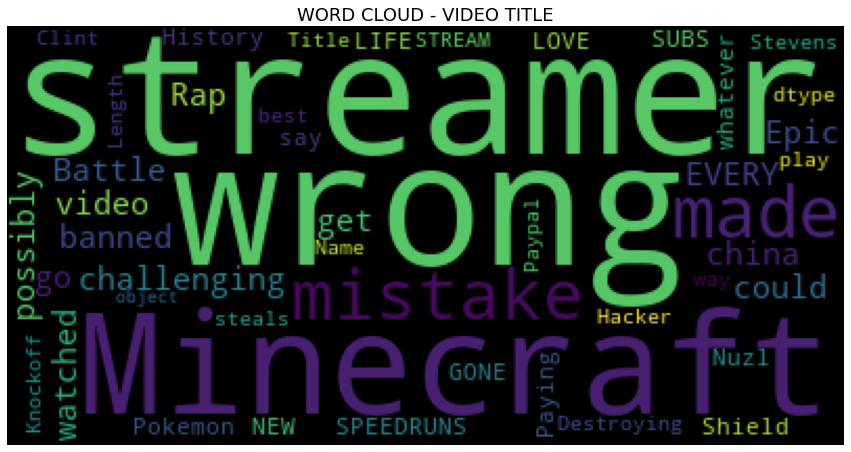

In [50]:
plt.rcParams['font.size']= 15              
plt.rcParams['savefig.dpi']= 100         
plt.rcParams['figure.subplot.bottom']= .1 
stopwords = set(stopwords.words("english"))
plt.figure(figsize = (15,15))
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['Title']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - VIDEO TITLE")
plt.axis('off')
plt.show()

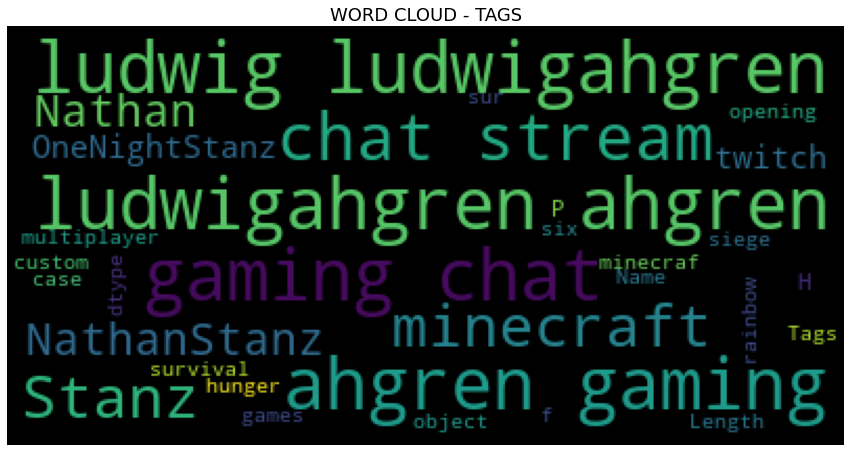

In [51]:
plt.figure(figsize = (15,15))
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['Tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

## Conclusion

From the above analysis, we can conclude that more descriptive titles will benefit viewcount, too many tags does not improve. Tags used by the more popular youtuber mainly consist of his name probably for visibility when people are searching. Eye-catching words like "Wrong", "Mistake", "Minecraft" are used often.